En esta programa se ilustra cómo usando una lista de datos se puede obtener una relación exponencial. Primero se grafican y se realiza una inspecciónen el formato gráfico para luego obtener la ecuación empírica a partir de ajustes de regresión lineal.   

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#matplotlib inline
import math
import cmath

Se defienen los arreglos. Utilizaremos los datos de casos confirmados de COVID-19 del día 8 al 16 de Abril 2019 en Morelos. Notemos que los tenemos que escribir en formato array


In [2]:
d1=np.array([1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32])
Casos1=np.array([30,  36,  40,  43,  48,  54,  58,  62,  65,  81,  86,  90,  95,  99, 106, 123, 146, 169, 190, 194, 244, 278, 324, 366, 417, 430, 500, 553,
 611, 655, 712, 774])

Ahora se ejemplificará un ajuste exponencial, pero primero haremos una inspección visual de los datos

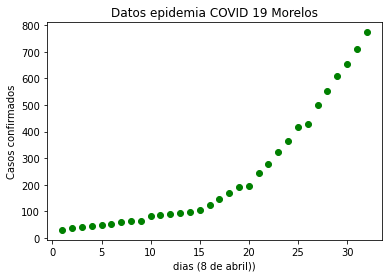

In [3]:
plt.figure()
plt.plot(d1,Casos1,'go',markersize=6)
plt.xlabel('dias (8 de abril))')
plt.ylabel('Casos confirmados')
plt.title('Datos epidemia COVID 19 Morelos');
plt.savefig('epiexpdatos.png',dpi=300)

Hacemos un cambio de variable con logaritmos naturales, se puede hacer con logaritmos en cualquier base.

In [4]:
ye=np.log(Casos1) # obtener el logaritmo de los datos

Graficamos los logaritmos de los casos contra los dias

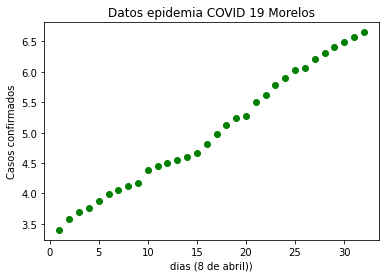

In [5]:
plt.figure()
plt.plot(d1,ye,'go',markersize=6)
plt.xlabel('dias (8 de abril))')
plt.ylabel('Casos confirmados')
plt.title('Datos epidemia COVID 19 Morelos');
plt.savefig('epiexplogdatos.png',dpi=300)


Observamos que visualmente podemos unir a casi todos los puntos con una recta imaginaria. Calculamos el ajuste de regresión lineal.

In [6]:
# definimos la funcion regrelineal
# en ella hemos codificado las formulas de regresion lienal por minimos cuadrados
def regrelineal(x, y):
    # numero de parejas de datos
    n = np.size(x)
    ny= np.size(y)
    if n != ny: 
       return('no son parejas de datos')
 
    # promedio de los arreglos x y y
    p_x = np.mean(x)
    p_y = np.mean(y)
 
    # calculando la desviacion cruzada y desviacion en x
    SS_xy = np.sum(y*x) - n*p_y*p_x
    SS_xx = np.sum(x*x) - n*p_x*p_x
 
    # calculo de m y b
    p1 = SS_xy / SS_xx
    p0 = p_y - p1*p_x

    # calculo de R cuadrada
    error = y - (p1*x + p0)
    se = np.sum(error**2)
    SSt = np.sum((y - p_y)**2)
    p2 = 1- (se/SSt)
 # el resultado p0 es la ordenada al origen p1 es la pendiente y p2 es R cuadrada
    return (p1, p0, p2)

In [7]:
# ajustamos la recta a los logaritmos de los datos
q1, q0, q2 = regrelineal(d1, ye)
#valores de y con el ajuste
yye = q1 * d1 + q0

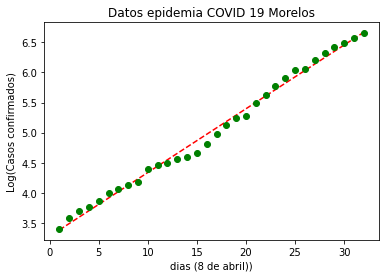

In [8]:
plt.figure()
plt.plot(d1,yye,'r--', d1,ye,'go',markersize=6)
plt.xlabel('dias (8 de abril))')
plt.ylabel('Log(Casos confirmados)')
plt.title('Datos epidemia COVID 19 Morelos');
plt.savefig('epiexp.png',dpi=300)

Como observamos el ajuste de la recta y los datos parece adecuado. El calculo que sigue ilustra el crecimiento exponencial

In [9]:
print('en el dia 100 habria ',int(np.exp(q1 * 100 + q0)), 'casos')

en el dia 100 habria  1060917 casos


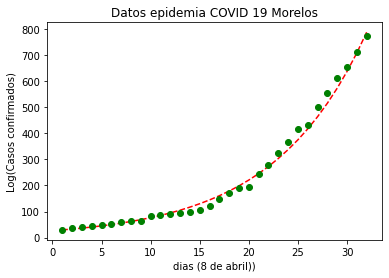

In [10]:
plt.figure()
plt.plot(d1,np.exp(yye),'r--', d1,Casos1,'go',markersize=6)
plt.xlabel('dias (8 de abril))')
plt.ylabel('Log(Casos confirmados)')
plt.title('Datos epidemia COVID 19 Morelos');
plt.savefig('epicompara.png',dpi=300)

observamos que el ajuste en los datos sin transformar tambien parece adecuado. Los valores de la pendiente y la ordenada al origen son

In [12]:
print(q1,q0, q2)

0.10597892105221812 3.2767523398769374 0.9929485858626823


Lo valores de la constante de crecimiento y de la condicion inicial son:

In [13]:
print(np.exp(q1),np.exp(q0))

1.111798440718255 26.489603622313073


In [15]:
print('La calidad del ajuste se observa con un valor',q2,'de R cuadrada, mientras más cercano a 1 (-1) es mejor')

La calidad del ajuste se observa con un valor 0.9929485858626823 de R cuadrada, mientras más cercano a 1 (-1) es mejor
